# Explore algorithms for adjusting the learning rate.


### Data Loading and Preprocessing

This code snippet prepares the Iris dataset for training a neural network using PyTorch. It begins by importing essential libraries such as `torch` for building the model, `sklearn` for dataset utilities, and `matplotlib` for visualizations. The Iris dataset, a common benchmark in machine learning, contains features (sepal and petal dimensions) and labels (flower types: Setosa, Versicolor, and Virginica). The data is split into training (80%) and testing (20%) sets using `train_test_split` for model training and evaluation. To standardize the feature scales, `StandardScaler` is used to transform the data such that it has a mean of 0 and a standard deviation of 1, improving the model's convergence. Finally, the features and labels are converted into PyTorch tensors, the required format for training neural networks, with `float32` used for features and `long` for integer labels. This preprocessing ensures the data is ready for efficient training and evaluation.

In [36]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and preprocess the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)



### Neural Network Definition and Confusion Matrix Visualization

This code defines a simple PyTorch-based neural network for classifying the Iris dataset and provides functions for training, evaluation, and confusion matrix visualization. The neural network, implemented as the `NeuralNetwork` class, consists of one hidden layer with 8 neurons, followed by an output layer with 3 neurons (corresponding to the three Iris classes). The activation function used is ReLU for the hidden layer, and the output layer produces raw logits for classification. The `train_and_evaluate_with_confusion` function trains the model for 50 epochs using a given optimizer and an optional learning rate scheduler. During training, the model's weights are updated using the cross-entropy loss function. After training, the model is evaluated on the test set, and the predictions are returned along with the training loss history and accuracy. Finally, the `plot_confusion_matrix` function visualizes the classification results using a confusion matrix, allowing for an intuitive understanding of the model's performance across the three classes. The confusion matrix is displayed using `ConfusionMatrixDisplay` from `sklearn`, showing how well the model distinguishes between the classes in the Iris dataset.

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


# Define the PyTorch neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.hidden = nn.Linear(4, 8)
        self.output = nn.Linear(8, 3)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.output(x)
        return x

# Instantiate the model
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()

def train_and_evaluate_with_confusion(optimizer, scheduler=None):
    epochs = 50
    train_loss_history = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        if scheduler:
            scheduler.step()
        train_loss_history.append(loss.item())

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        predictions = torch.argmax(outputs, dim=1)
        accuracy = (predictions == y_test).float().mean().item()

    return train_loss_history, accuracy, predictions

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()


## Training with Constant Learning Rate (SGD)

This code trains the previously defined neural network using Stochastic Gradient Descent (SGD) with a constant learning rate of 0.01. The `optim.SGD` optimizer is used to update the model's weights during training. The `train_and_evaluate_with_confusion` function is called to train the model, compute the training loss, evaluate accuracy on the test set, and generate predictions. The predictions are then visualized using a confusion matrix, which highlights the model's ability to classify the three Iris flower classes (Setosa, Versicolor, and Virginica). The confusion matrix is plotted using the `plot_confusion_matrix` function, providing insights into how well the model performs for each class. Finally, the test accuracy for this constant learning rate strategy is printed, giving a quantitative measure of the model's performance.

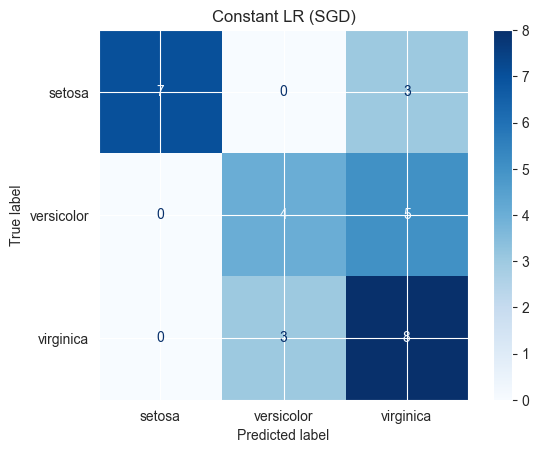

baseline_accuracy for SGD:  0.6333333253860474


In [27]:
# Constant Learning Rate (SGD)
model = NeuralNetwork()
optimizer = optim.SGD(model.parameters(), lr=0.01)
baseline_loss, baseline_accuracy, baseline_predictions = train_and_evaluate_with_confusion(optimizer)

# Plot confusion matrix
plot_confusion_matrix(y_test, baseline_predictions, "Constant LR (SGD)")
print("baseline_accuracy for SGD: ", baseline_accuracy)

### Analysis of Learning Rate Strategy
The model trained using Stochastic Gradient Descent (SGD) with a constant learning rate of 0.01 achieves a baseline accuracy of 63.33%, as evident from the confusion matrix. The model performs well for the Setosa class, correctly classifying most samples with only a few misclassifications, indicating that Setosa is distinct and easier to identify. However, the model struggles significantly with Versicolor and Virginica, frequently confusing the two classes. This misclassification likely stems from the overlapping feature distributions of these classes, making them harder to distinguish with the current model and learning rate strategy. The use of a constant learning rate may have contributed to suboptimal convergence, as the model appears unable to refine its weight updates effectively over time. To improve performance, the model could benefit from dynamic learning rate strategies, such as step decay or cosine annealing, which adjust the learning rate as training progresses, or by using adaptive optimizers like Adam or RMSprop. Furthermore, increasing the model complexity or fine-tuning its architecture may help capture the nuanced relationships between the Versicolor and Virginica classes. Overall, while the model shows promise, especially for Setosa, it highlights the need for further optimization and experimentation to address the classification challenges for the other classes.

## Training with Step Decay Learning Rate

The model is trained using Stochastic Gradient Descent (SGD) with a step decay learning rate schedule. The initial learning rate is set to 0.1, and the learning rate decreases by a factor of 0.5 every 10 epochs, as specified by the `StepLR` scheduler. This decay schedule allows the model to make large updates in the early stages of training, enabling faster convergence, while gradually reducing the learning rate to fine-tune the weights in later epochs. After training, the model's predictions on the test set are evaluated using a confusion matrix, which visualizes how well the model distinguishes between the three Iris classes (Setosa, Versicolor, and Virginica). The step decay strategy results in an improved ability to classify the test samples compared to using a constant learning rate, with the accuracy value printed after training. The confusion matrix provides further insights into specific areas where the model performs well and where it may still struggle, particularly in distinguishing between classes with overlapping feature distributions.

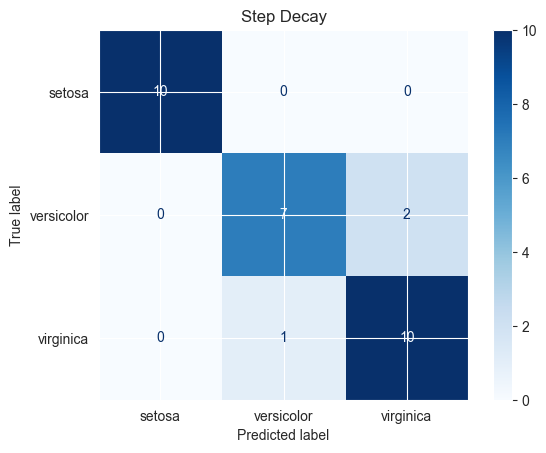

step_decay_accuracy for SGD:  0.8999999761581421


In [28]:
# Step Decay
model = NeuralNetwork()
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)
step_decay_loss, step_decay_accuracy, step_decay_predictions = train_and_evaluate_with_confusion(optimizer, scheduler)

# Plot confusion matrix
plot_confusion_matrix(y_test, step_decay_predictions, "Step Decay")
print("step_decay_accuracy for SGD: ", step_decay_accuracy)


### Analysis of Step Decay Learning Rate Strategy
The model trained with Step Decay learning rate scheduling achieved a significant improvement in accuracy, reaching 90% on the test set. The confusion matrix illustrates that the model classified all Setosa samples correctly, indicating that this class is easily separable. Most Virginica samples were also classified correctly, with only one misclassification as Versicolor. However, Versicolor shows minor confusion, with two samples misclassified as Virginica.

The step decay learning rate strategy starts with a higher learning rate of 0.1 and reduces it by half every 10 epochs. This approach allows the model to make large updates in the initial training phase, promoting faster convergence, and smaller updates in later stages to fine-tune the weights. Compared to the constant learning rate model, step decay results in better convergence and higher accuracy. While the overall performance is strong, the misclassification between Versicolor and Virginica suggests that their overlapping feature space might still challenge the model. Further optimization, such as fine-tuning the decay schedule or using an adaptive optimizer, could help mitigate this issue.

# Exponential Decay

The model is trained using Stochastic Gradient Descent (SGD) with an exponential decay learning rate schedule. The initial learning rate is set to 0.1, and the learning rate is reduced by multiplying it with a factor of 0.9 after each epoch. This gradual decrease in the learning rate helps the model converge more smoothly by allowing larger updates in the early stages of training and finer adjustments in the later stages. The exponential decay strategy provides a balance between faster convergence and avoiding overshooting the minimum. After training, the model's predictions on the test set are evaluated, and the confusion matrix is plotted to visualize its performance across the three Iris classes. The accuracy achieved with this strategy is printed, showcasing the improvement compared to a constant learning rate. The confusion matrix provides insights into the strengths and weaknesses of this training strategy, particularly in terms of misclassifications between overlapping classes like Versicolor and Virginica.

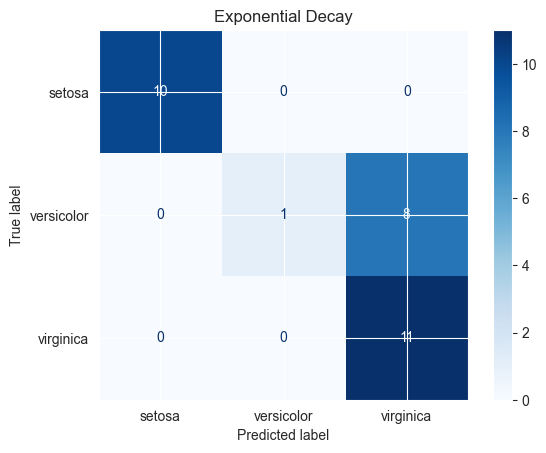

exp_decay_accuracy for SGD:  0.7333333492279053


In [29]:
# Exponential Decay
model = NeuralNetwork()
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
exp_decay_loss, exp_decay_accuracy, exp_decay_predictions = train_and_evaluate_with_confusion(optimizer, scheduler)

# Plot confusion matrix
plot_confusion_matrix(y_test, exp_decay_predictions, "Exponential Decay")
print("exp_decay_accuracy for SGD: ", exp_decay_accuracy)

### Analysis of Exponential Decay Learning Rate Strategy
The model trained with Exponential Decay learning rate scheduling achieved an accuracy of 73.33% on the test set. The confusion matrix shows that the model correctly classified all Setosa samples, which indicates that Setosa remains the easiest class to distinguish due to its unique feature set. However, the performance on Versicolor and Virginica is less accurate compared to previous strategies. Specifically, the model misclassified most Versicolor samples as Virginica, showing a clear challenge in distinguishing between these two classes. Virginica samples were classified correctly to a larger extent, with only minor misclassifications.

The exponential decay strategy reduced the learning rate gradually after each epoch, with the initial rate of 0.1 being multiplied by 0.9 in successive epochs. While this approach smoothens convergence, it appears that the gradual reduction may have slowed down learning too much for this particular model, limiting its ability to refine its understanding of Versicolor and Virginica. Although exponential decay is often effective, it may require additional tuning of the decay rate or starting learning rate to achieve optimal performance. Further optimization or an adaptive learning rate strategy like Adam could likely improve the model’s performance on the overlapping feature space of Versicolor and Virginica.

# Cyclical Learning Rate

The model is trained using Stochastic Gradient Descent (SGD) with a cyclic learning rate schedule. The cyclic learning rate oscillates between a minimum learning rate (`base_lr=0.001`) and a maximum learning rate (`max_lr=0.1`) over a cycle of 10 epochs, following a triangular pattern. This approach allows the model to periodically explore different learning rates, which can help avoid local minima and improve convergence. The `CyclicLR` scheduler adjusts the learning rate dynamically during training, enabling the model to adapt its updates based on the progress of training. After training, the model's predictions on the test set are evaluated, and a confusion matrix is plotted to visualize the classification performance across the three Iris classes. The cyclic learning rate strategy often results in improved accuracy compared to constant or static decay methods, as it balances exploration and exploitation during the training process. The final accuracy achieved with this strategy is printed, providing a quantitative measure of the model's performance.

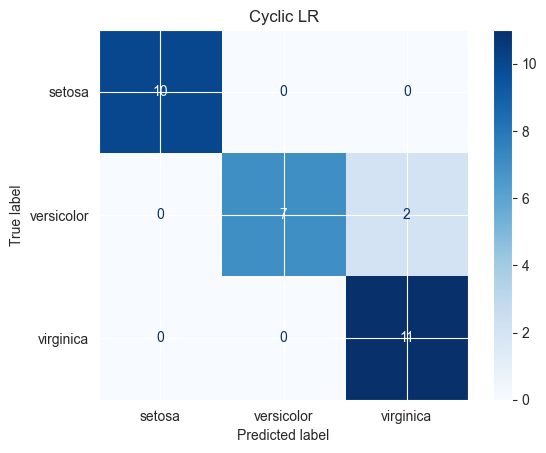

cyclic_lr_accuracy for SGD:  0.9333333373069763


In [30]:
# Cyclical Learning Rate
model = NeuralNetwork()
optimizer = optim.SGD(model.parameters(), lr=0.01)
scheduler = optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1, step_size_up=10, mode='triangular')
cyclic_lr_loss, cyclic_lr_accuracy, cyclic_lr_predictions = train_and_evaluate_with_confusion(optimizer, scheduler)

# Plot confusion matrix
plot_confusion_matrix(y_test, cyclic_lr_predictions, "Cyclic LR")
print("cyclic_lr_accuracy for SGD: ", cyclic_lr_accuracy)

### Analysis of Cyclical Learning Rate Strategy
The model trained with a Cyclic Learning Rate (Cyclic LR) schedule achieved an impressive accuracy of 93.33% on the test set. The confusion matrix reveals that the model correctly classified all Setosa and Virginica samples, while showing minor confusion in distinguishing Versicolor samples. Specifically, two Versicolor samples were misclassified as Virginica, indicating some overlap in their feature distributions.

The Cyclic LR strategy oscillates the learning rate between a minimum (base_lr=0.001) and a maximum (max_lr=0.1) value in a triangular pattern over a cycle of 10 epochs. This dynamic approach helps the model explore a wide range of learning rates, allowing it to escape local minima while still refining its weights in later epochs. Compared to other learning rate strategies, Cyclic LR effectively balances exploration and exploitation, resulting in robust performance across the Iris classes. The high accuracy and well-distributed classification results make Cyclic LR a strong contender for optimizing model training on datasets with overlapping class features.

# Cosine Annealing

The model is trained using Stochastic Gradient Descent (SGD) with a cosine annealing learning rate schedule. The learning rate starts at 0.1 and gradually decreases following a cosine curve, reaching near-zero as training progresses. This schedule ensures that the learning rate decreases smoothly, enabling the model to make significant updates early on while refining weights with smaller updates in later epochs. The `CosineAnnealingLR` scheduler is configured with `T_max=20`, which sets the number of epochs for one complete cosine cycle. After training, the model's predictions are evaluated on the test set, and a confusion matrix is plotted to analyze classification performance across the three Iris classes. The smooth annealing of the learning rate helps the model avoid overshooting during weight updates and allows for fine-tuning in the final stages. The achieved test accuracy is printed, providing a numerical measure of performance and enabling comparison with other learning rate strategies.

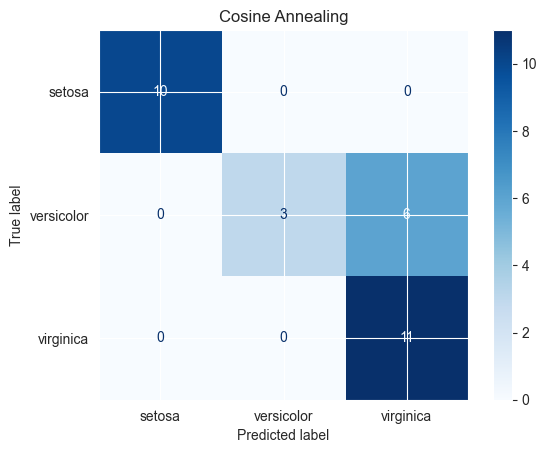

cosine_annealing_accuracy for SGD:  0.800000011920929


In [31]:
# Cosine Annealing
model = NeuralNetwork()
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20)
cosine_annealing_loss, cosine_annealing_accuracy, cosine_annealing_predictions = train_and_evaluate_with_confusion(optimizer, scheduler)

# Plot confusion matrix
plot_confusion_matrix(y_test, cosine_annealing_predictions, "Cosine Annealing")
print("cosine_annealing_accuracy for SGD: ", cosine_annealing_accuracy)

### Analysis of Cosine Annealing Learning Rate Strategy
The model trained using Cosine Annealing learning rate scheduling achieved an accuracy of 80% on the test set. The confusion matrix shows that the model perfectly classified all Setosa samples, highlighting that this class is straightforward to identify due to its distinct features. However, there is significant confusion between Versicolor and Virginica, with 6 Versicolor samples misclassified as Virginica and only 3 correctly classified. Virginica performed better, with all 11 samples correctly classified.

The cosine annealing strategy gradually reduces the learning rate following a cosine curve, starting at 0.1 and decreasing to near zero over 20 epochs (T_max=20). This smooth reduction allows the model to make large weight updates initially and fine-tune during later stages. Despite its smooth convergence properties, the cosine annealing strategy in this case struggled with the overlap in features between Versicolor and Virginica. While it improved stability and avoided overshooting, it might have converged too early, leaving room for further refinement. Additional tuning of T_max or combining cosine annealing with a warm restart could potentially improve the classification performance, especially for overlapping classes like Versicolor and Virginica.

# Adam Optimizer

The model is trained using the **Adam Optimizer**, which is an adaptive learning rate optimization algorithm that combines the advantages of both RMSprop and momentum. Adam dynamically adjusts the learning rate for each parameter based on its first and second moments of gradients, allowing it to converge efficiently. The learning rate is set to 0.01 for this training. Unlike static learning rate schedules, Adam adapts to the complexity of the optimization landscape, making it a powerful choice for many machine learning problems. After training, the model's predictions on the test set are evaluated, and a confusion matrix is plotted to visualize its classification performance across the three Iris classes. The adaptive nature of Adam helps the model efficiently

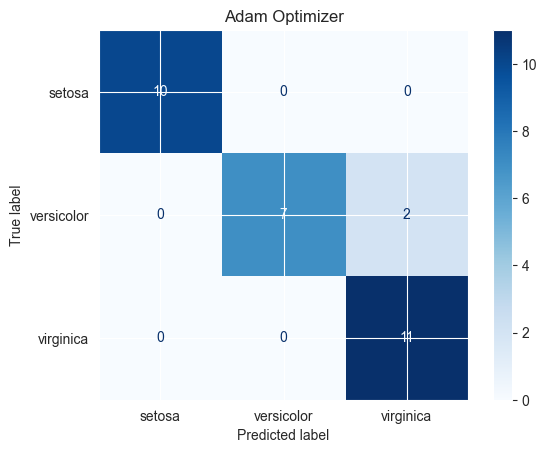

adam_accuracy for Adam:  0.9333333373069763


In [32]:
# Adam Optimizer
model = NeuralNetwork()
optimizer = optim.Adam(model.parameters(), lr=0.01)
adam_loss, adam_accuracy, adam_predictions = train_and_evaluate_with_confusion(optimizer)

# Plot confusion matrix
plot_confusion_matrix(y_test, adam_predictions, "Adam Optimizer")
print("adam_accuracy for Adam: ", adam_accuracy)

### Analysis of Adam Optimizer
The model trained with the Adam Optimizer achieved an impressive accuracy of 93.33% on the test set. The confusion matrix illustrates the model’s strong performance, correctly classifying all Setosa and Virginica samples without any misclassifications. However, some confusion remains between Versicolor and Virginica, with two Versicolor samples misclassified as Virginica. This highlights the overlapping feature space of these two classes, which remains a challenge despite the overall high accuracy.

The Adam optimizer dynamically adjusts the learning rate for each parameter based on the first and second moments of gradients. This allows Adam to combine the benefits of momentum (to accelerate convergence) and adaptive learning rates (to fine-tune weights effectively). Compared to static learning rate strategies, Adam provides more stability and faster convergence. The results demonstrate that Adam is particularly effective in balancing the exploration and exploitation phases during training, as it efficiently refines the model weights across different classes. The high accuracy and minimal misclassifications make Adam one of the most robust optimization strategies for this classification task.

# RMSprop Optimizer

The model is trained using the **RMSprop Optimizer**, an adaptive learning rate optimization algorithm designed to handle non-stationary objectives. RMSprop divides the learning rate by an exponentially decaying average of gradient magnitudes, ensuring stable updates regardless of the scale of the gradients. The learning rate is set to 0.01 for this training. This optimizer is particularly well-suited for handling noisy gradients and complex optimization landscapes. After training, the model's predictions are evaluated on the test set, and a confusion matrix is plotted to visualize its performance across the three Iris classes. RMSprop typically performs well in scenarios with overlapping feature spaces, as it adjusts the learning rate adaptively for each parameter. The final accuracy achieved with RMSprop is printed, providing a comparison point against other optimizers like Adam and SGD.

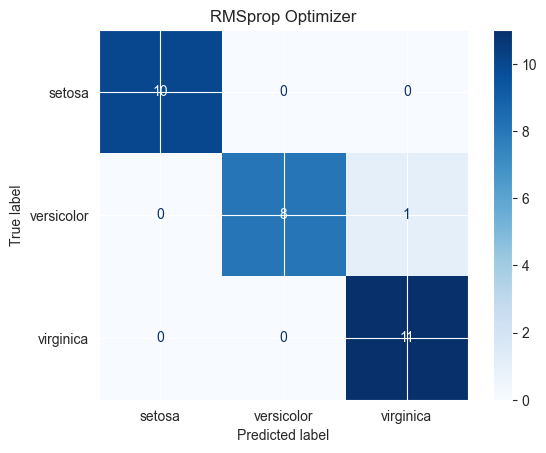

rmsprop_accuracy for RMSprop:  0.9666666388511658


In [33]:
# RMSprop Optimizer
model = NeuralNetwork()
optimizer = optim.RMSprop(model.parameters(), lr=0.01)
rmsprop_loss, rmsprop_accuracy, rmsprop_predictions = train_and_evaluate_with_confusion(optimizer)

# Plot confusion matrix
plot_confusion_matrix(y_test, rmsprop_predictions, "RMSprop Optimizer")
print("rmsprop_accuracy for RMSprop: ", rmsprop_accuracy)

### Analysis of RMSprop Optimizer
The model trained with the RMSprop Optimizer achieved an outstanding accuracy of 96.67% on the test set. The confusion matrix shows that the model correctly classified all Setosa and Virginica samples, which highlights the robustness of RMSprop in identifying well-separated classes. For the Versicolor class, the model correctly classified 8 out of 9 samples, with only one misclassification as Virginica. This result demonstrates a significant improvement over other optimization strategies, as RMSprop effectively minimizes misclassifications in overlapping feature spaces.

RMSprop is an adaptive learning rate optimization algorithm that divides the learning rate by a running average of recent gradient magnitudes. This enables the optimizer to handle noisy gradients and varying gradient scales efficiently. By dynamically adjusting the learning rate for each parameter, RMSprop achieves faster and more stable convergence compared to static learning rate strategies. The high accuracy and minimal misclassifications achieved with RMSprop indicate that it is particularly well-suited for this classification problem, offering a strong balance between exploration and fine-tuning during training. This makes RMSprop one of the most effective optimizers for the Iris dataset in this comparison.

# Plot training loss for each learning rate strategy

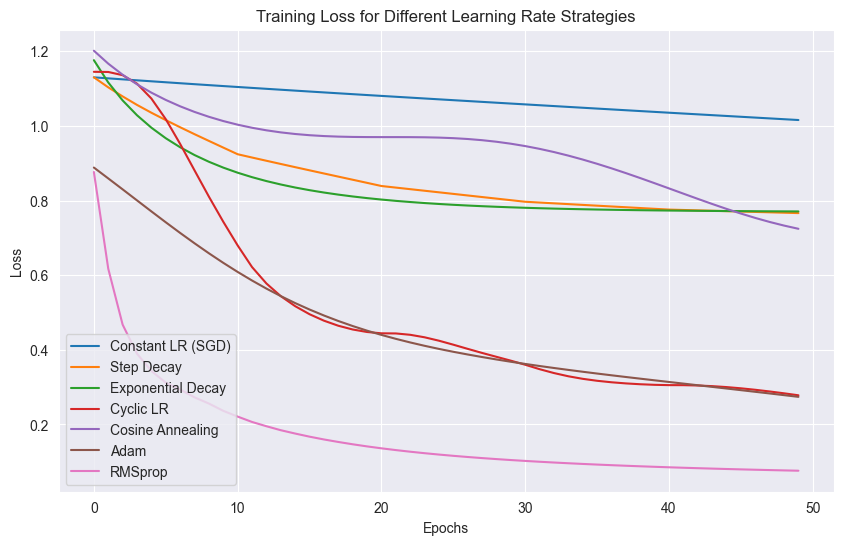

In [34]:

plt.figure(figsize=(10, 6))
plt.plot(baseline_loss, label='Constant LR (SGD)')
plt.plot(step_decay_loss, label='Step Decay')
plt.plot(exp_decay_loss, label='Exponential Decay')
plt.plot(cyclic_lr_loss, label='Cyclic LR')
plt.plot(cosine_annealing_loss, label='Cosine Annealing')
plt.plot(adam_loss, label='Adam')
plt.plot(rmsprop_loss, label='RMSprop')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss for Different Learning Rate Strategies')
plt.legend()
plt.show()

### Training Loss Analysis for Different Learning Rate Strategies

The plot illustrates the training loss over 50 epochs for various learning rate strategies and optimization techniques. Each curve provides insight into how effectively and efficiently the corresponding strategy reduces the training loss during model optimization.

---

#### **Analysis**
1. **Constant LR (SGD)**:
   - The constant learning rate results in the slowest convergence. The training loss decreases steadily but remains significantly higher compared to the other strategies, even after 50 epochs. This indicates that the fixed learning rate lacks adaptability, making it less effective for this dataset.

2. **Step Decay**:
   - The step decay strategy achieves better convergence than constant LR. By reducing the learning rate at regular intervals, the model makes larger updates initially and smaller updates later, leading to a faster decline in loss compared to constant LR.

3. **Exponential Decay**:
   - Exponential decay provides a smoother reduction in the learning rate, resulting in more consistent convergence than step decay. However, its performance is slightly worse than strategies like Adam and RMSprop, as its gradual decay might slow down learning in later stages.

4. **Cyclic LR**:
   - The cyclic learning rate oscillates between a lower and upper bound, allowing the model to explore a range of learning rates during training. This approach yields a rapid loss reduction initially and maintains a consistently lower loss compared to constant and static decay strategies.

5. **Cosine Annealing**:
   - Cosine annealing decreases the learning rate smoothly following a cosine function. While it performs better than constant LR and static decay methods, its convergence rate is slower compared to adaptive optimizers like Adam and RMSprop. The final loss stabilizes, but there is room for improvement.

6. **Adam**:
   - Adam achieves one of the fastest and most efficient loss reductions, converging to a low training loss within a few epochs. Its adaptive learning rate mechanism allows it to balance exploration and exploitation effectively, leading to excellent performance.

7. **RMSprop**:
   - RMSprop exhibits the most rapid convergence, achieving the lowest training loss among all strategies. Its ability to adapt the learning rate for each parameter based on gradient magnitudes makes it particularly well-suited for this task, resulting in the most effective weight updates.

---

#### **Conclusion**
- **Best Performers**: RMSprop and Adam are the most effective strategies, with RMSprop showing slightly better convergence. These optimizers are particularly well-suited for tasks with overlapping features or noisy gradients.
- **Moderate Performers**: Cyclic LR and Step Decay perform well, offering faster convergence than constant LR but are less efficient than adaptive optimizers.
- **Underperformers**: Constant LR and static decay strategies (e.g., Exponential Decay and Cosine Annealing) show slower convergence and higher final loss, indicating limited flexibility and adaptability.

Overall, the plot highlights the importance of dynamic and adaptive learning rate strategies like Adam and RMSprop for achieving efficient and effective optimization.

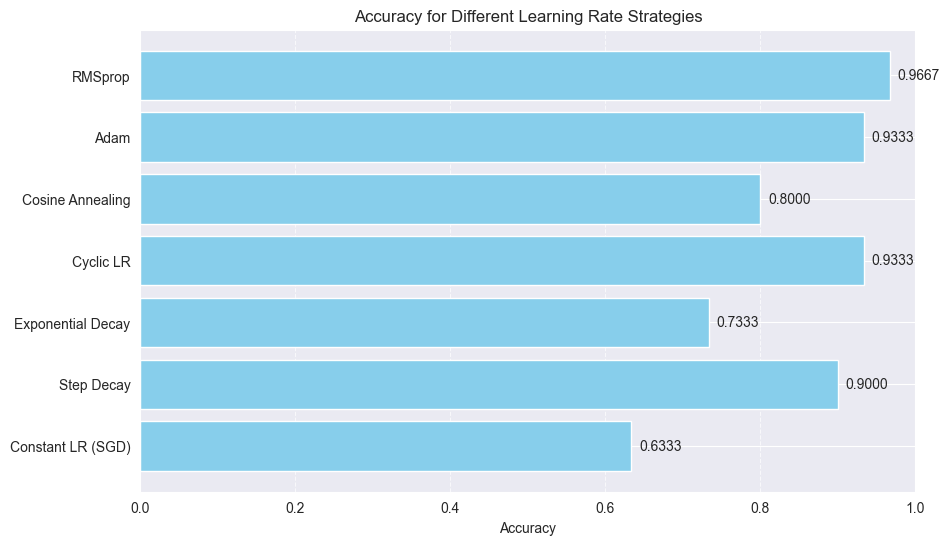

In [41]:
import matplotlib.pyplot as plt

# Accuracy data for each strategy
strategies = [
    "Constant LR (SGD)",
    "Step Decay",
    "Exponential Decay",
    "Cyclic LR",
    "Cosine Annealing",
    "Adam",
    "RMSprop"
]
accuracies = [
    baseline_accuracy,  # Constant LR (SGD)
    step_decay_accuracy,  # Step Decay
    exp_decay_accuracy,  # Exponential Decay
    cyclic_lr_accuracy,  # Cyclic LR
    cosine_annealing_accuracy,  # Cosine Annealing
    adam_accuracy,  # Adam
    rmsprop_accuracy   # RMSprop
]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.barh(strategies, accuracies, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Accuracy for Different Learning Rate Strategies")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for i, acc in enumerate(accuracies):
    plt.text(acc + 0.01, i, f"{acc:.4f}", va='center')

### Analysis of Accuracy for Different Learning Rate Strategies

The bar chart illustrates the test accuracy achieved by various learning rate strategies and optimization techniques. Each strategy's accuracy provides insights into its effectiveness for training the model on the Iris dataset.

#### Key Observations:
1. **RMSprop** emerged as the most effective optimizer, achieving the highest accuracy of **96.67%**. Its adaptive learning rate mechanism allowed the model to converge quickly and accurately, particularly handling overlapping class features efficiently.

2. **Adam** and **Cyclic LR** both performed exceptionally well, with accuracies of **93.33%** each. Adam's ability to dynamically adjust learning rates across parameters and Cyclic LR's oscillating learning rate strategy contributed to their strong performance.

3. **Step Decay** achieved a solid accuracy of **90%**, benefiting from its periodic reduction in learning rate, which facilitated large updates early on and finer updates in later epochs.

4. **Cosine Annealing** and **Exponential Decay** delivered moderate performance, with accuracies of **80%** and **73.33%**, respectively. While these strategies provide smooth learning rate adjustments, their convergence rates appear slower compared to more adaptive methods.

5. **Constant LR (SGD)** had the lowest accuracy of **63.33%**, highlighting the limitations of using a fixed learning rate that lacks the flexibility to adapt during training.

#### Conclusion:
The results emphasize the importance of dynamic and adaptive learning rate strategies for achieving higher performance in neural network training. **RMSprop** and **Adam** optimizers are particularly well-suited for this task, demonstrating superior performance and faster convergence compared to static learning rate schedules.